In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('data.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.rename(columns={'y':'subscribe'}, inplace=True)

In [5]:
df.subscribe.replace(('yes', 'no'), (1, 0), inplace=True)

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [7]:
df.drop(columns = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  campaign     41188 non-null  int64 
 12  pdays        41188 non-null  int64 
 13  previous     41188 non-null  int64 
 14  poutcome     41188 non-null  object
 15  subscribe    41188 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 5.0+ MB


In [9]:
df.describe()

,age,duration,campaign,pdays,previous,subscribe
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.000000


In [10]:
df.to_csv('subscribe_data.csv', header = True)

### Find Missing Values(NaN)

In [11]:
df.isna().any()

age            False
job            False
marital        False
education      False
default        False
housing        False
loan           False
contact        False
month          False
day_of_week    False
duration       False
campaign       False
pdays          False
previous       False
poutcome       False
subscribe      False
dtype: bool

### Visualized the categorical features

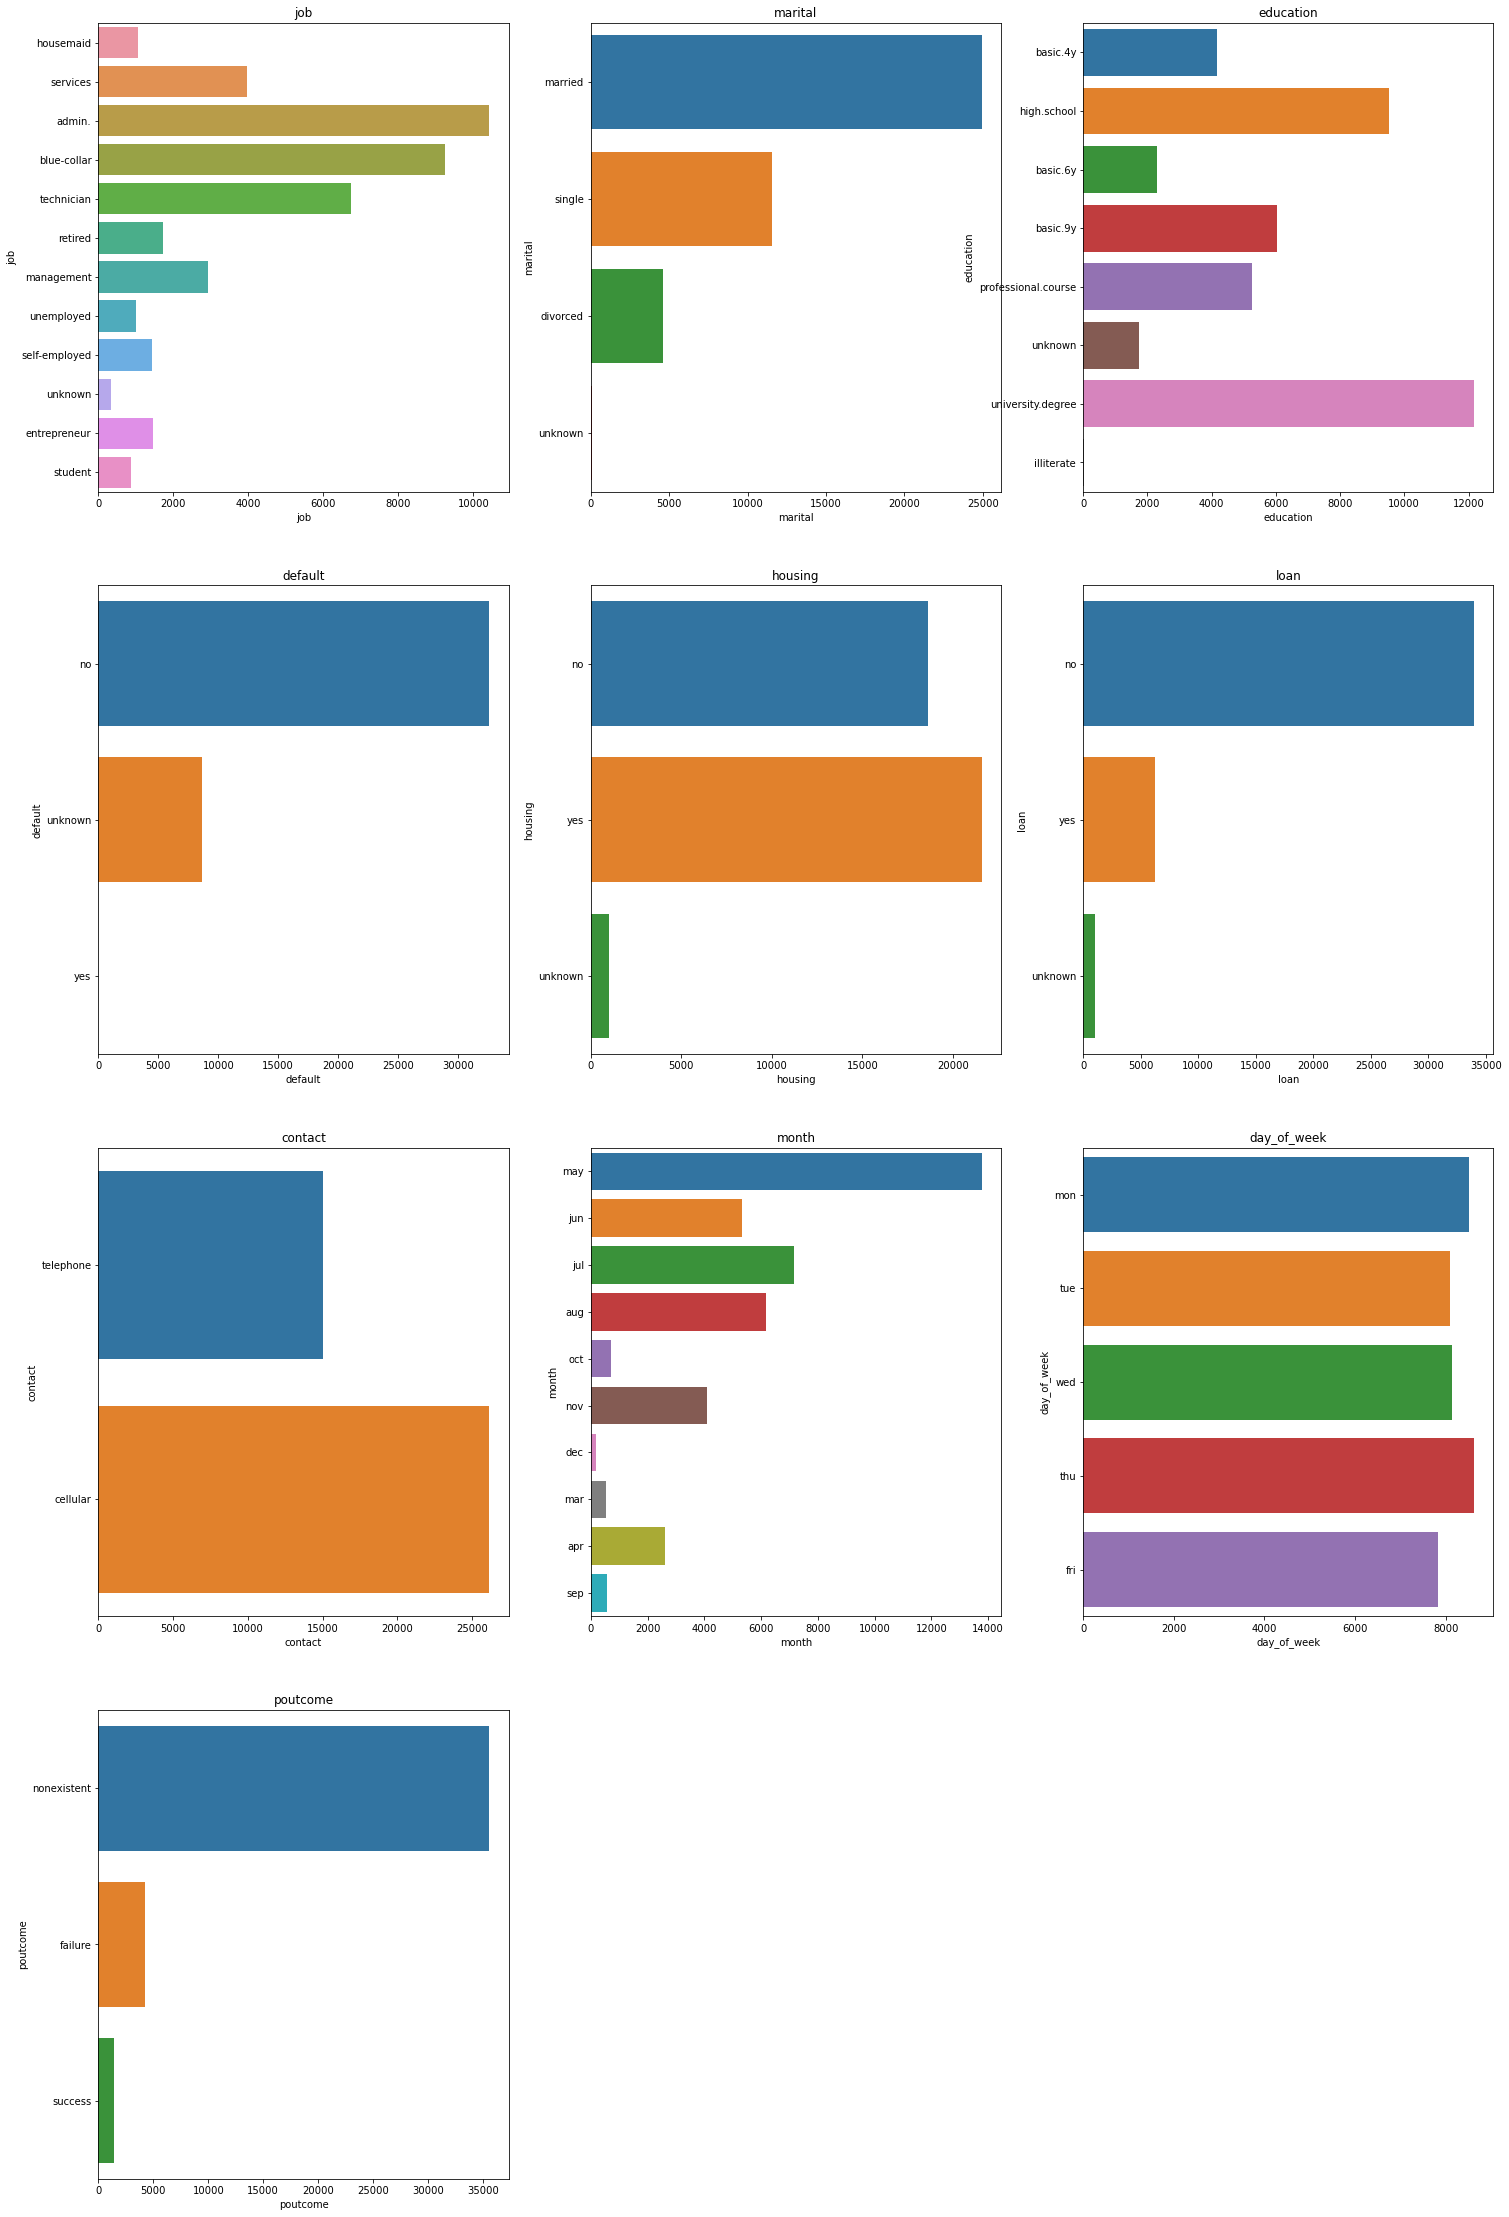

In [12]:
cat_feats = [col for col, dtype in df.dtypes.items() if dtype == 'object']

plt.figure(figsize=(25,50), facecolor='white')
plotnumber=1
for cat_feat in cat_feats:
    ax = plt.subplot(5,3,plotnumber)
    sns.countplot(y=cat_feat, data=df)
    plt.xlabel(cat_feat)
    plt.title(cat_feat)
    plotnumber+=1
plt.show()


### Visualized the numerical features

/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/Elena/Anaconda/anaconda3

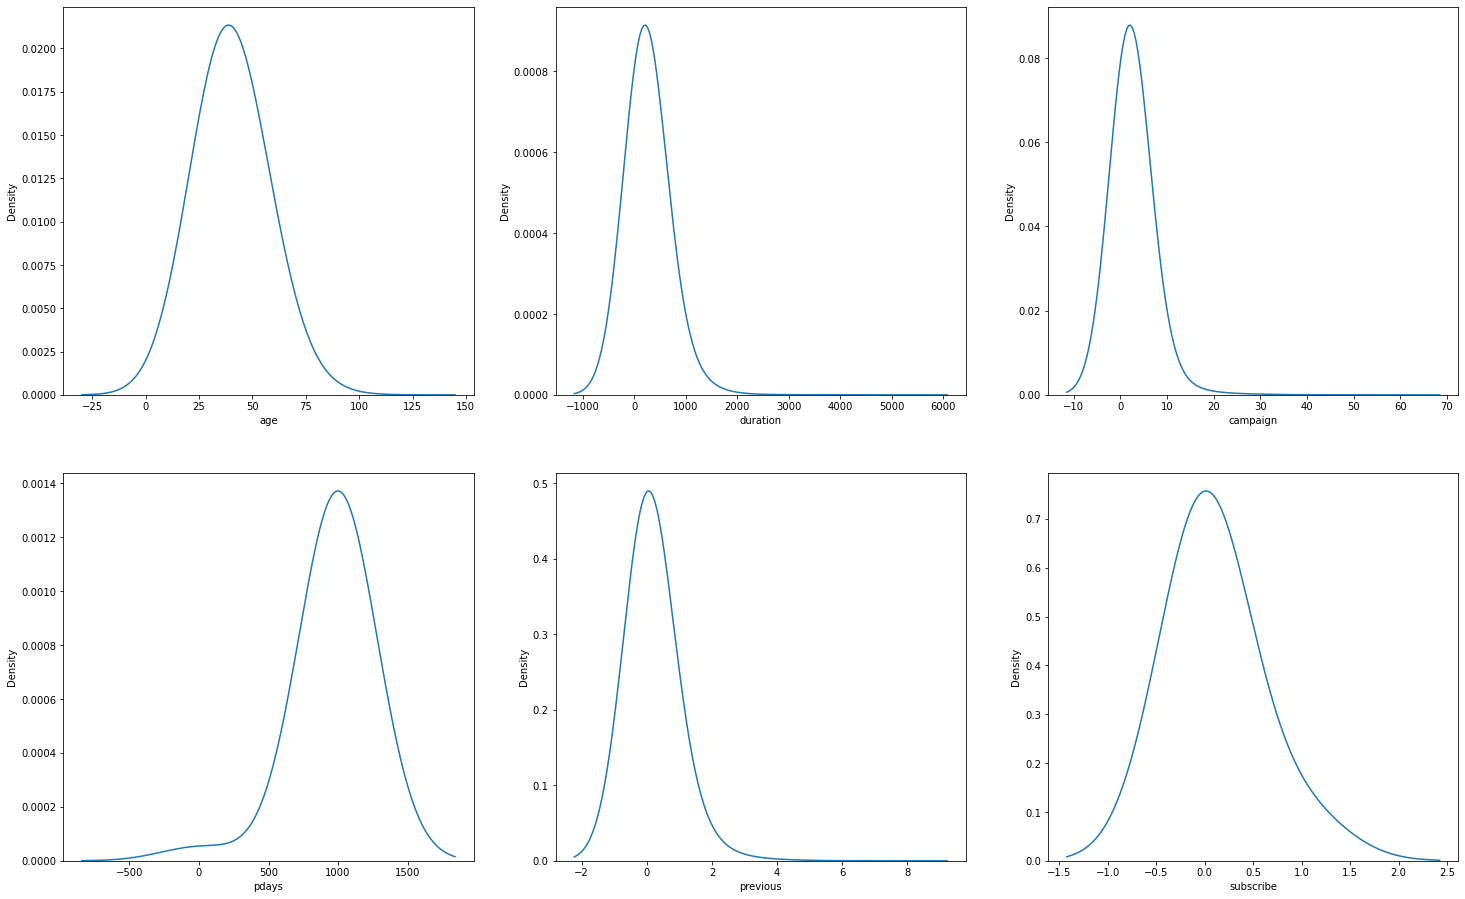

In [13]:
num_feats = [col for col, dtype in df.dtypes.items() if dtype == 'int64' or dtype == 'float64']

plt.figure(figsize=(25,50), facecolor='white')
plotnumber=1
for num_feat in num_feats:
    ax = plt.subplot(6,3,plotnumber)
    sns.kdeplot(df[num_feat],bw=1.5)
    plt.xlabel(num_feat)
    plotnumber+=1
plt.show()

### Convert categorical features to numerical

In [14]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [16]:
cleanup = {"job":     {"housemaid":1, "services":2, "admin.":3, "blue-collar":4, "technician":2,
       "retired":3, "management":4, "unemployed":0, "self-employed":3, "unknown":1,
       "entrepreneur":4, "student":2},
           
          "marital":  {"married":2,"divorced":3,"single":0,"unknown":1},
           
          "education":{"basic.4y":1, "high.school":2, "basic.6y":1, "basic.9y":1,
       "professional.course":3, "unknown":1, "university.degree":3,
       "illiterate":0},
           
           "default":{"no":0, "unknown":1, "yes":2},
           
           "housing":{"no":0, "unknown":1, "yes":2},
           
           "loan":{"no":0, "unknown":1, "yes":2},
           
           "contact":{"telephone":1, "cellular":0},
         
           "poutcome":{"nonexistent":1, "failure":0, "success":2},
           
           "month":{"may":5, "jun":6, "jul":7, "aug":8, "oct":10, "nov":11, "dec":12, "mar":3, "apr":4,
       "sep":9},
           
           "day_of_week":{"mon":1, "tue":2, "wed":3, "thu":4, "fri":5}
           
}

In [17]:
df = df.replace(cleanup)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,subscribe
0,56,1,2,1,0,0,0,1,5,1,261,1,999,0,1,0
1,57,2,2,2,1,0,0,1,5,1,149,1,999,0,1,0
2,37,2,2,2,0,2,0,1,5,1,226,1,999,0,1,0
3,40,3,2,1,0,0,0,1,5,1,151,1,999,0,1,0
4,56,2,2,2,0,0,2,1,5,1,307,1,999,0,1,0


## Feature importance

In [106]:
X = df.drop(columns = ['subscribe'])
y = df['subscribe']

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


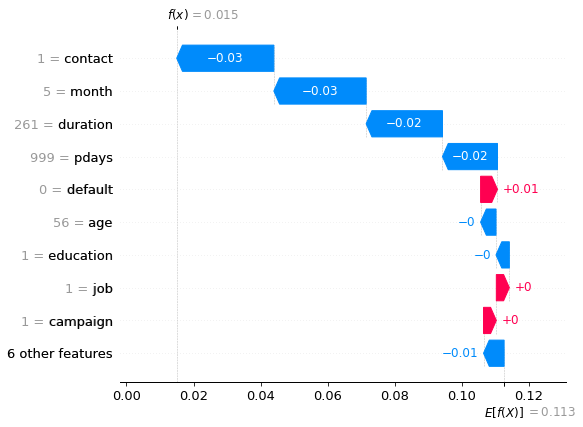

In [19]:
import xgboost
import shap

model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

Training done using Random Forest


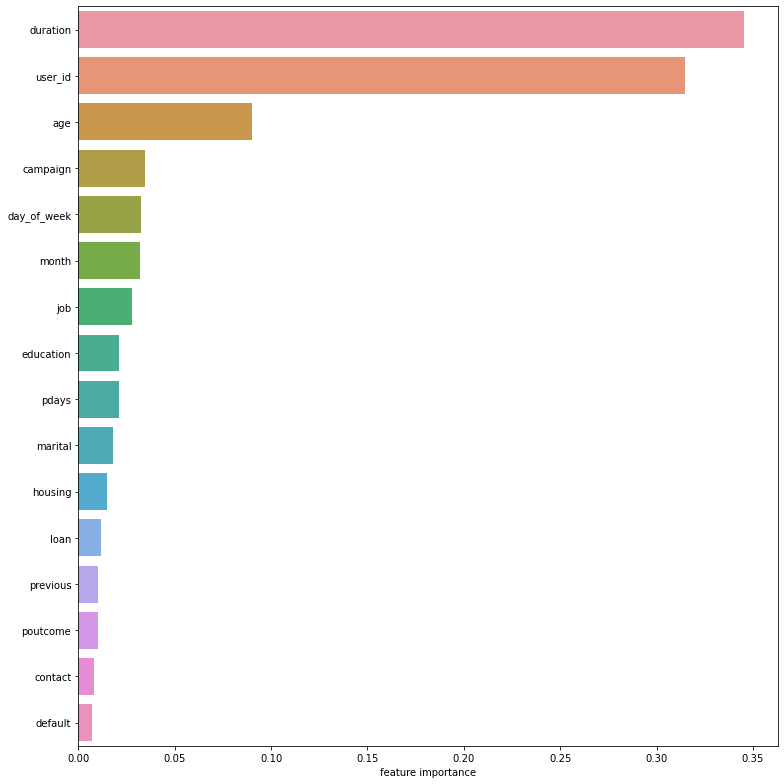

In [107]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X, y)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 11))
sns.barplot(x=rf.feature_importances_[ranking], y=X.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.savefig('feature_importance.png')

<AxesSubplot:>

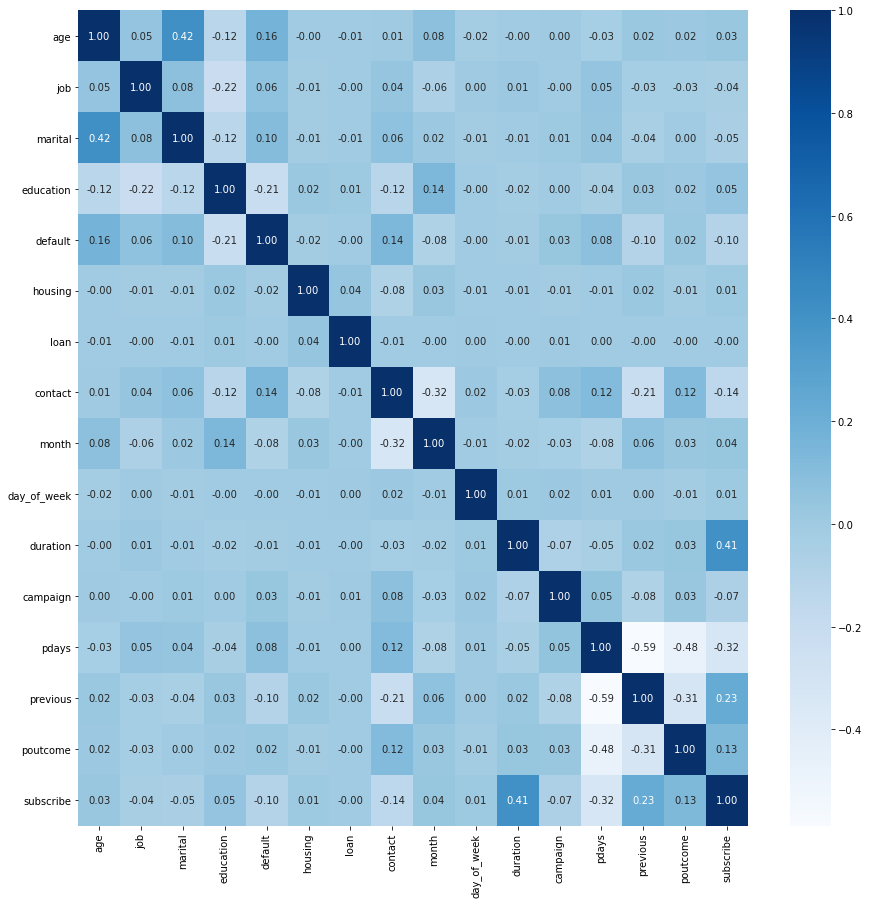

In [21]:
## Correlation between features
cor = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(cor, fmt='.2f', annot=True, cmap='Blues')

In [22]:
## Duratation highly impact the target value. However, duration is not a factor that can be predicted before a call
## is made. Also, because the campaign outcome will most likely be decided by the end of call, this factor cannot be
## treated as a feature.

In [23]:
df.drop(columns = ['duration'])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,subscribe
0,56,1,2,1,0,0,0,1,5,1,1,999,0,1,0
1,57,2,2,2,1,0,0,1,5,1,1,999,0,1,0
2,37,2,2,2,0,2,0,1,5,1,1,999,0,1,0
3,40,3,2,1,0,0,0,1,5,1,1,999,0,1,0
4,56,2,2,2,0,0,2,1,5,1,1,999,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,3,2,3,0,2,0,0,11,5,1,999,0,1,1
41184,46,4,2,3,0,0,0,0,11,5,1,999,0,1,0
41185,56,3,2,3,0,2,0,0,11,5,2,999,0,1,0
41186,44,2,2,3,0,0,0,0,11,5,1,999,0,1,1


## Feature Engineering

In [24]:
df.index

RangeIndex(start=0, stop=41188, step=1)

In [25]:
df['user_id'] = range(1, len(df)+1)

In [26]:
def plot_features(df_feature, sample_size=500):
    
    sample = (df_feature.drop(['user_id'],axis=1)
                .sample(1000, random_state=44)) 
    sns.pairplot(sample,hue='subscribe', plot_kws=dict(alpha=.3, edgecolor='none'))

In [27]:
## Write functions to iterate the validation/testing process

In [28]:
def get_user_split_data(df_feature, test_size =.2, seed=42):
    
    rs = np.random.RandomState(seed)
    
    total_users = df_feature['user_id'].unique() 
    test_users = rs.choice(total_users, 
                           size=int(total_users.shape[0] * test_size), 
                           replace=False)

    df_tr = df_feature[~df_feature['user_id'].isin(test_users)]
    df_te = df_feature[df_feature['user_id'].isin(test_users)] 
    
    y_tr, y_te = df_tr['subscribe'], df_te['subscribe']
    X_tr = df_tr.drop(['user_id','subscribe'],axis=1) 
    X_te = df_te.drop(['user_id','subscribe'],axis=1)

    return X_tr, X_te, y_tr, y_te

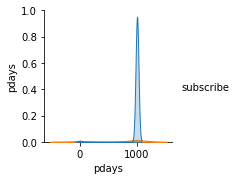

In [29]:
df_pdays = df[['pdays','user_id','subscribe']]
plot_features(df_pdays)

In [30]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_pdays)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

0.0

In [31]:
##Opps, apparently pdays is not a good feature

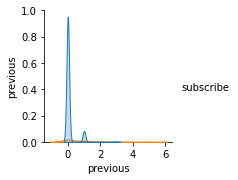

In [32]:
df_previous = df[['previous','user_id','subscribe']]
plot_features(df_previous)

In [33]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_previous)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

0.07028112449799195

In [34]:
## now we are doing better, let's add more features

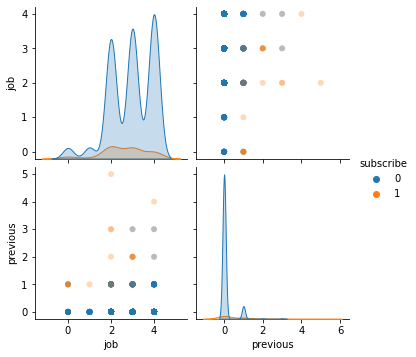

In [35]:
df_job = df[['job','previous','user_id','subscribe']]
plot_features(df_job)

In [36]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_job)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

0.07028112449799195

In [37]:
## Job feature didn't improve the score

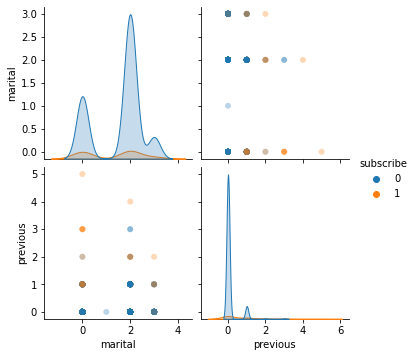

In [38]:
df_marital = df[['marital','previous','user_id','subscribe']]
plot_features(df_marital)

In [39]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_marital)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

0.07028112449799195

In [40]:
## Neither does marital status

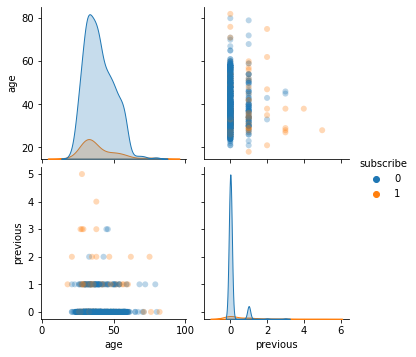

In [41]:
df_age = df[['age','previous','user_id','subscribe']]
plot_features(df_age)

In [42]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_age)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

0.07028112449799195

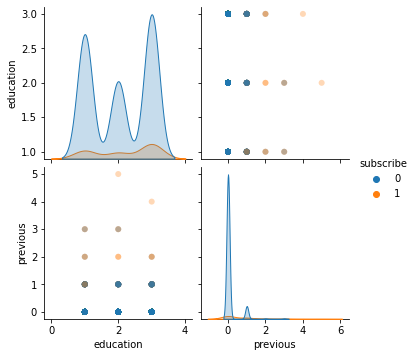

In [43]:
df_edu = df[['education','previous','user_id','subscribe']]
plot_features(df_edu)

In [44]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_edu)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

0.07028112449799195

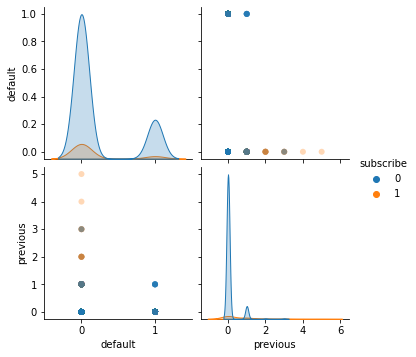

In [45]:
df_default = df[['default','previous','user_id','subscribe']]
plot_features(df_default)

In [46]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_default)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

0.07035175879396983

In [47]:
## Default improved a little bit

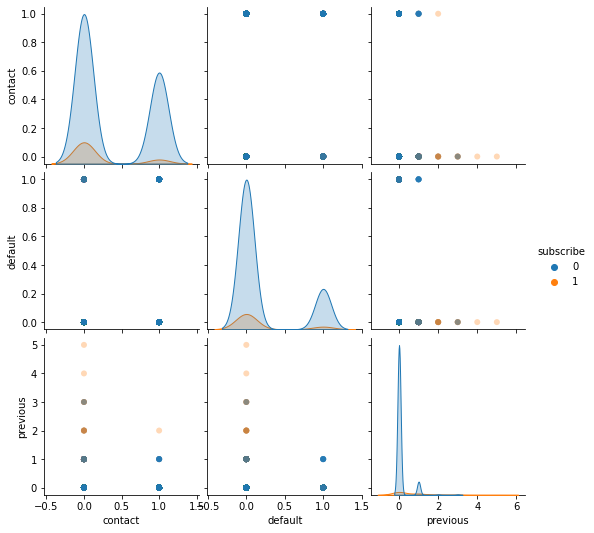

In [48]:
df_contact = df[['contact','default','previous','user_id','subscribe']]
plot_features(df_contact)

In [49]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_contact)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

0.07035175879396983

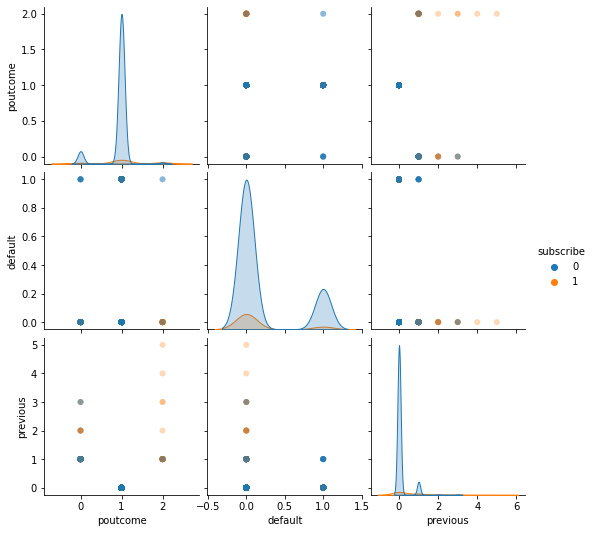

In [50]:
df_poutcome = df[['poutcome','default','previous','user_id','subscribe']]
plot_features(df_poutcome)

In [51]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_poutcome)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

0.2918032786885246

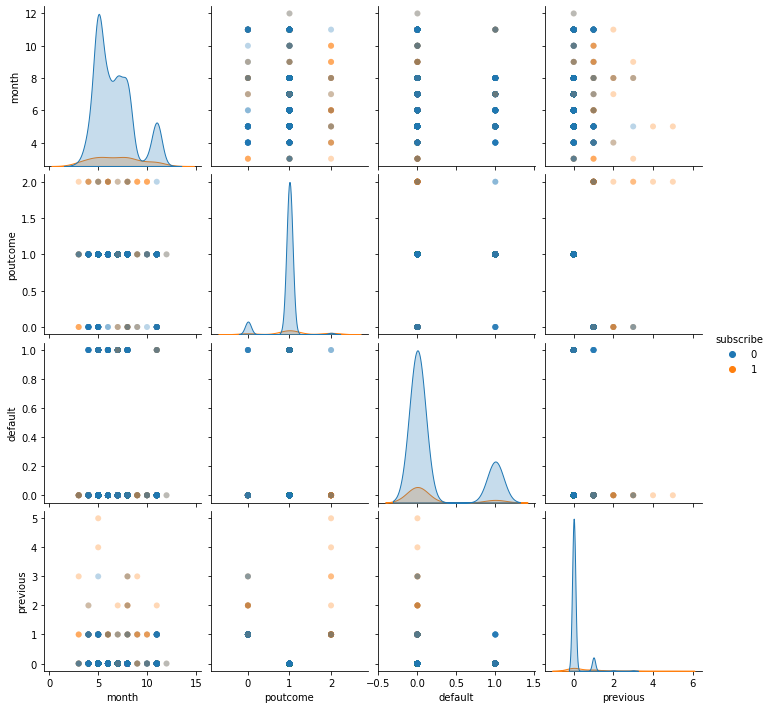

In [52]:
df_month = df[['month','poutcome','default','previous','user_id','subscribe']]
plot_features(df_month)

In [53]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_month)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

0.2441150828247602

In [54]:
## month decreased the score

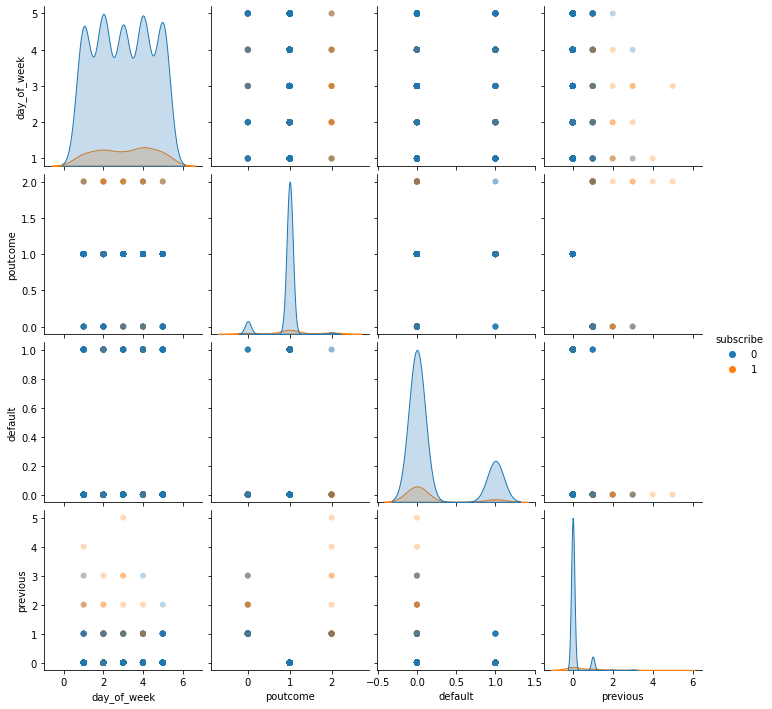

In [55]:
df_dayofweek = df[['day_of_week','poutcome','default','previous','user_id','subscribe']]
plot_features(df_dayofweek)

In [56]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_dayofweek)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

0.2484900776531493

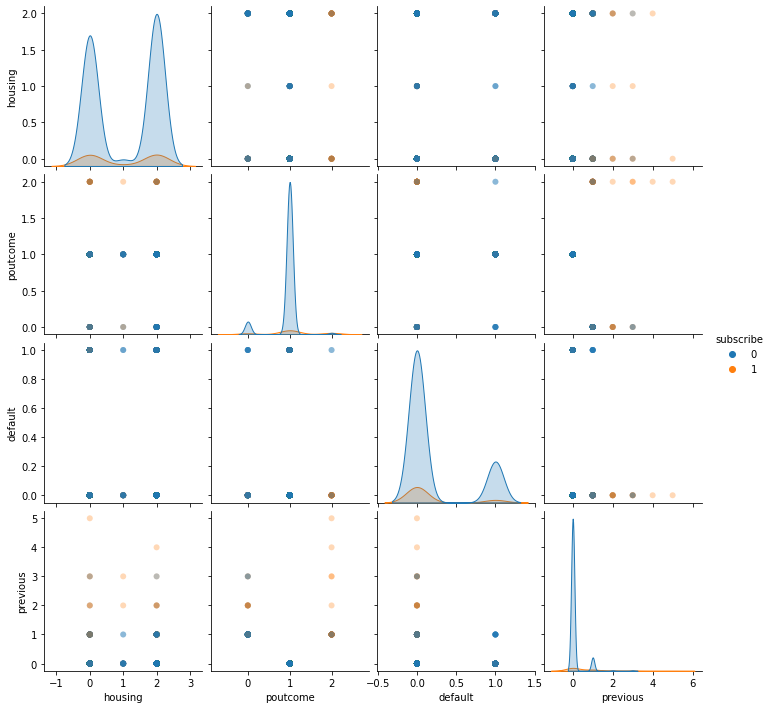

In [57]:
df_housing = df[['housing','poutcome','default','previous','user_id','subscribe']]
plot_features(df_housing)

In [58]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_housing)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

0.2517241379310345

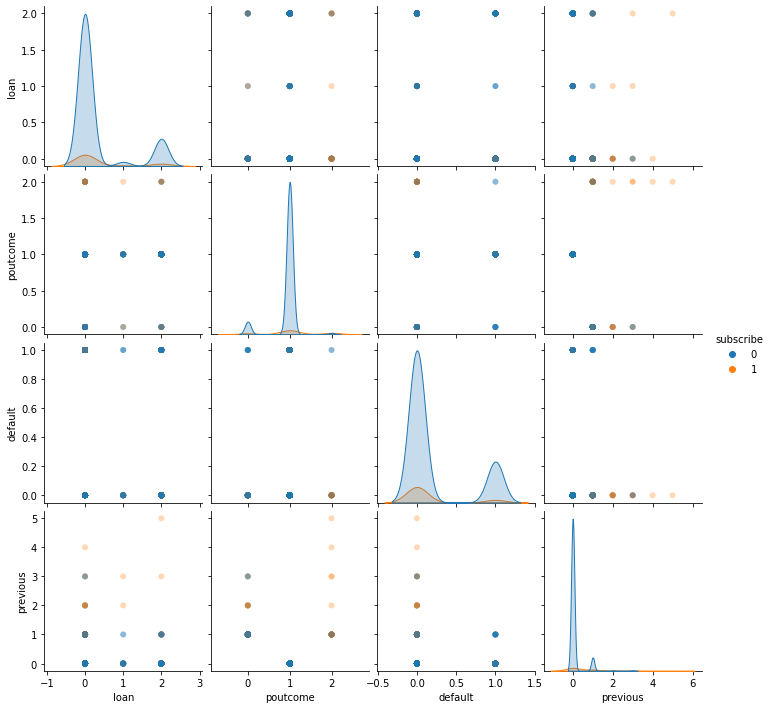

In [59]:
df_loan = df[['loan','poutcome','default','previous','user_id','subscribe']]
plot_features(df_loan)

In [60]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_loan)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
f1_score(lr.predict(X_te), y_te)

0.28524046434494194

In [61]:
## After feature engineering, education, job, marital, housing, loan, previous outcome, default
## and previous will impact subscription

### Check the distribution of target values

In [62]:
df['subscribe'].groupby(df['subscribe']).count()

subscribe
0    36548
1     4640
Name: subscribe, dtype: int64

In [63]:
## This dataset is highly imbalanced

### Handle class imbalace using SMOTE method

In [64]:
df_final = df[['age','job','education','marital','housing','loan',
               'poutcome','default','previous','user_id','subscribe']]

In [65]:
X_tr, X_te, y_tr, y_te = get_user_split_data(df_final)

In [66]:
from sklearn.metrics import f1_score, roc_auc_score
import imblearn.over_sampling

n_pos = np.sum(y_tr == 1)
n_neg = np.sum(y_tr == 0)

ratio = {1:n_pos*4, 0:n_neg} #1/2 of majority is 18274, about 4 times of minority, thus the ratio is set at 4

smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
    
X_tr_smote, y_tr_smote = smote.fit_resample(X_tr, y_tr)

lr_smote = LogisticRegression(solver='liblinear') 
lr_smote.fit(X_tr_smote, y_tr_smote)

print('Logistic Regression on SMOTE Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_te, lr_smote.predict(X_te)), roc_auc_score(y_te, lr_smote.predict_proba(X_te)[:,1])))

Logistic Regression on SMOTE Train Data; Test F1: 0.322, Test AUC: 0.681


In [67]:
## Oversampling the minority class does improve the F1 score

### Predictive Model

In [68]:
from sklearn import linear_model, neighbors, ensemble
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier

In [69]:
def k_fold_fit_and_evaluate(X, y, model, scoring_method, n_splits=5):
    cv = KFold(n_splits=5, random_state=42, shuffle=True)
    scores = cross_validate(model, X_tr_smote, y_tr_smote, scoring=scoring_method, cv=cv, n_jobs=-1)
    return scores["test_score"]

scoring_method_f1 = make_scorer(lambda true_target, prediction: f1_score(true_target, prediction, average="weighted"))

In [70]:
random_state = 42
models = {
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=32, min_samples_leaf=1, random_state=random_state),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=1, weights="uniform"),   
    "LogisticRegression": LogisticRegression(C=8, random_state=random_state),
    "XGBClassifier": XGBClassifier(objective='binary:logistic', learning_rate=0.1, max_depth=22, n_estimators=300),
    "RandomForestClassifier": ensemble.RandomForestClassifier(n_estimators=100, random_state=random_state)
}

[21:01:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[21:01:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprec

[21:01:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprec

[21:01:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:01:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


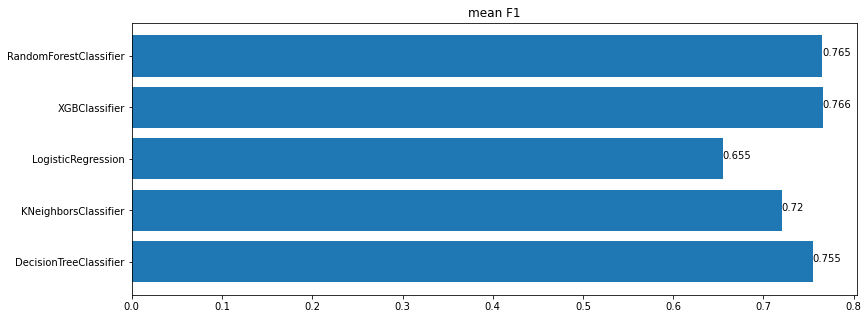

/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [90]:
dict_f1 = {}
for name, model in models.items():
    metrics_f1 = k_fold_fit_and_evaluate(X_tr_smote, y_tr_smote, model, scoring_method_f1, n_splits=5) 
    dict_f1[name] = np.mean(metrics_f1)
    
val = []
for i in dict_f1.values():
    val.append(i)

keys = []
for i in dict_f1.keys():
    keys.append(i)

plt.figure(figsize=(13,5))
plt.barh(keys, val)
for index, value in enumerate(val):
    plt.text(value, index, str(round(value,3)))
plt.title("mean F1")

plt.savefig('model.png')

In [72]:
## RandomForestClassifier, XGBClassifier, DeccisionTreeClassifier are the best three models
## Look for the best hyperparameter for the three models

In [73]:
from sklearn.model_selection import GridSearchCV

scoring_method = make_scorer(lambda prediction, true_target: f1_score(true_target, prediction, average="weighted"))

In [74]:
model_parameters = {
    "DecisionTreeClassifier": {
        'max_depth': [10, 15, 20, 22, 28, 32, 37, 38, 42, 45, 50, 60],
        'min_samples_leaf':[1, 2, 3, 4, 5]
    },
    
    "RandomForestClassifier": {
        'max_depth': [10, 15, 20, 22, 28, 32, 37, 38, 42, 45, 50, 60],
        'min_samples_leaf':[1, 2, 3, 4, 5]
    },
    
    "XGBClassifier":{
        'min_child_weight': [1, 5, 10],
        'max_depth': [3, 7, 9, 12]
    }
}

In [75]:
for model_name, parameters in model_parameters.items():
    model = models[model_name]
    
    cv = KFold(n_splits=5, random_state=42, shuffle=True)
    grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=-1, verbose=False, scoring=scoring_method).fit(X_tr_smote, y_tr_smote)

    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    print(model_name)
    print("- best_score =", best_score)
    print("best paramters:")
    for k,v in best_params.items():
        print("-", k, v)

DecisionTreeClassifier
- best_score = 0.779113216865085
best paramters:
- max_depth 10
- min_samples_leaf 1
RandomForestClassifier
- best_score = 0.7887776507653802
best paramters:
- max_depth 15
- min_samples_leaf 1


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[13:41:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
- best_score = 0.787508118314907
best paramters:
- max_depth 9
- min_child_weight 1


In [ ]:
## test hyperparameters on test data

In [76]:
dtc_model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, random_state=42)
xgb_model = XGBClassifier(objective='binary:logistic', n_estimators=300, max_depth=9, min_child_weight=1, learning_rate=0.1)
rf_model = ensemble.RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_leaf=1, random_state=42)

model_names = ["dtc_model", "xgb_model", "rf_model"]

for model_name in model_names:
    curr_model = eval(model_name)
    
    curr_model.fit(X_tr_smote, y_tr_smote)
    print(f'{model_name} score: {curr_model.score(X_te, y_te)}')

dtc_model score: 0.8817530654364453
[13:41:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


xgb_model score: 0.8619643073934685
rf_model score: 0.8716765812795921


## Confusion Matrix and AUC-ROC

### DecisionTreeClassifier

In [77]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [78]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, random_state=0)
dt.fit(X_tr, y_tr)

y_predicted_dt = dt.predict(X_te)
print(classification_report(y_te, y_predicted_dt, zero_division = 0))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7302
           1       0.58      0.18      0.27       935

    accuracy                           0.89      8237
   macro avg       0.74      0.58      0.61      8237
weighted avg       0.87      0.89      0.87      8237



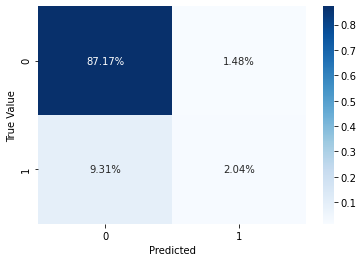

In [92]:
cm = confusion_matrix(y_te, y_predicted_dt)
sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.savefig('decisiontree.png')

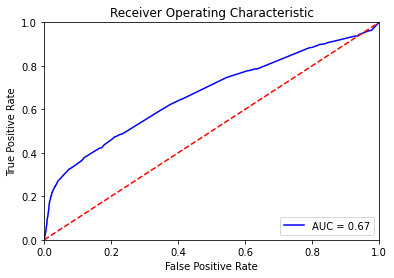

In [93]:
probs = dt.predict_proba(X_te)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_te, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('dc_auc.png')

### XGBClassifier

In [81]:
xgb=XGBClassifier(objective='binary:logistic', n_estimators=300, max_depth=3, min_child_weight=1, learning_rate=0.1)
xgb.fit(X_tr, y_tr)

y_predicted_xgb = xgb.predict(X_te)

print(classification_report(y_te, y_predicted_xgb, zero_division = 0))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[13:42:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7302
           1       0.64      0.19      0.29       935

    accuracy                           0.90      8237
   macro avg       0.77      0.59      0.62      8237
weighted avg       0.87      0.90      0.87      8237



Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


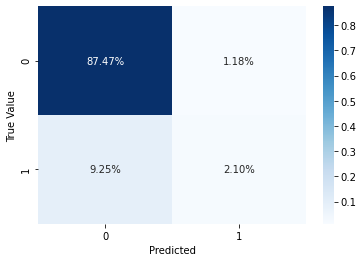

In [94]:
cm = confusion_matrix(y_te,y_predicted_xgb)
sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.savefig('xgb.png')

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


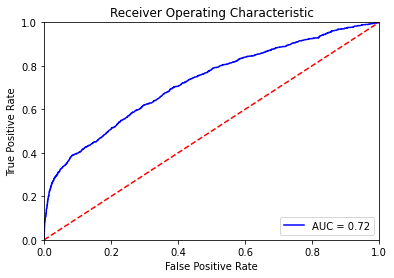

In [95]:
probs = xgb.predict_proba(X_te)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_te, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('xgb_auc.png')

### RandomForest

In [84]:
rf=ensemble.RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=1, random_state=42)
rf.fit(X_tr, y_tr)

y_predicted_rf = rf.predict(X_te)

print(classification_report(y_te, y_predicted_rf, zero_division = 0))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7302
           1       0.63      0.18      0.28       935

    accuracy                           0.89      8237
   macro avg       0.77      0.58      0.61      8237
weighted avg       0.87      0.89      0.87      8237



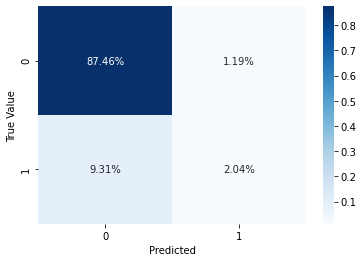

In [96]:
cm = confusion_matrix(y_te,y_predicted_rf)
sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.savefig('rf.png')

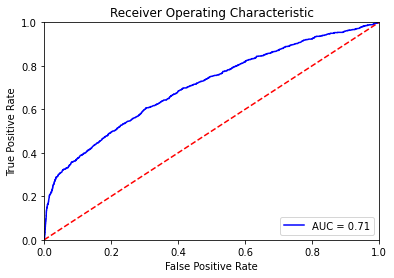

In [97]:
probs = rf.predict_proba(X_te)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_te, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('rf_auc.png')

In [ ]:
## Create another SHAP graph

In [103]:
X = df_final[['age','job','education','marital','housing','loan',
               'poutcome','default','previous']]
y =df_final['subscribe']

[22:34:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


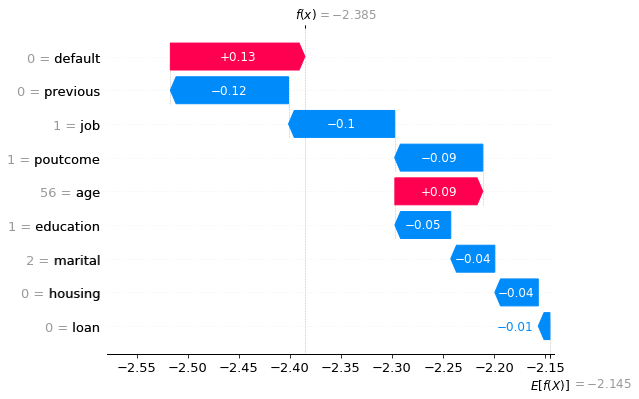

In [104]:
md = xgb.fit(X, y)

explainer = shap.Explainer(md)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

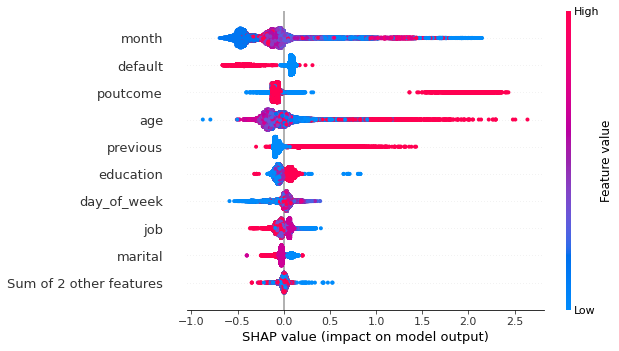

In [102]:
shap.plots.beeswarm(shap_values)